In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Read Data

In [3]:
data = pd.read_csv('complete_dataset_cleaned.csv')
data.pop('Pkey')
data.set_index('date', inplace=True)
data.pop('human_development_index')
data=data.iloc[:,:-2]


data.head()

,continent,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,,,,
7/17/2020,Africa,Algeria,13.423,0.113,1.20,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
7/18/2020,Africa,Algeria,13.604,0.249,1.18,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
7/20/2020,Africa,Algeria,13.740,0.204,1.15,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
7/21/2020,Africa,Algeria,13.287,0.294,1.14,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
7/22/2020,Africa,Algeria,13.446,0.249,1.13,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154


In [4]:
data=data.iloc[:,1:]
data.pop('population_density')
data.pop('gdp_per_capita')
data.pop('cardiovasc_death_rate')
data.pop('diabetes_prevalence')
data.pop('female_smokers')
data.pop('male_smokers')
data.pop('hospital_beds_per_thousand')
data.pop('life_expectancy')
df=data
df

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
7/17/2020,Algeria,13.423,0.113,1.20,0.0,74.07,NaN,1.403
7/18/2020,Algeria,13.604,0.249,1.18,0.0,74.07,NaN,1.517
7/20/2020,Algeria,13.740,0.204,1.15,0.0,74.07,NaN,1.449
7/21/2020,Algeria,13.287,0.294,1.14,0.0,74.07,NaN,1.268
7/22/2020,Algeria,13.446,0.249,1.13,0.0,74.07,NaN,1.154
...,...,...,...,...,...,...,...,...
10/7/2022,United States,217.809,1.166,0.86,0.0,25.99,NaN,7.875
10/8/2022,United States,22.659,0.139,0.86,0.0,25.99,NaN,7.772
10/9/2022,United States,14.905,0.012,0.86,0.0,25.99,NaN,7.852


In [5]:
c_countries=['Algeria', 'Argentina', 'Bulgaria', 'Chile', 'Romania', 'Serbia','South Africa']

In [6]:
data=data.loc[data['location'].isin(c_countries)]

In [7]:
data

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
7/17/2020,Algeria,13.423,0.113,1.20,0.00,74.07,NaN,1.403
7/18/2020,Algeria,13.604,0.249,1.18,0.00,74.07,NaN,1.517
7/20/2020,Algeria,13.740,0.204,1.15,0.00,74.07,NaN,1.449
7/21/2020,Algeria,13.287,0.294,1.14,0.00,74.07,NaN,1.268
7/22/2020,Algeria,13.446,0.249,1.13,0.00,74.07,NaN,1.154
...,...,...,...,...,...,...,...,...
7/22/2022,South Africa,5.337,0.017,0.95,62.46,11.11,NaN,1.936
7/23/2022,South Africa,0.000,0.000,0.92,62.48,11.11,NaN,1.886
7/24/2022,South Africa,0.000,0.000,0.92,0.00,11.11,NaN,3.569


In [8]:
i=1
d=['1','2','3','4','5','6','7','8','9','10']
for c in c_countries:
 d[i]=data[data['location']==c]
 i=i+1

#Plot Your Data

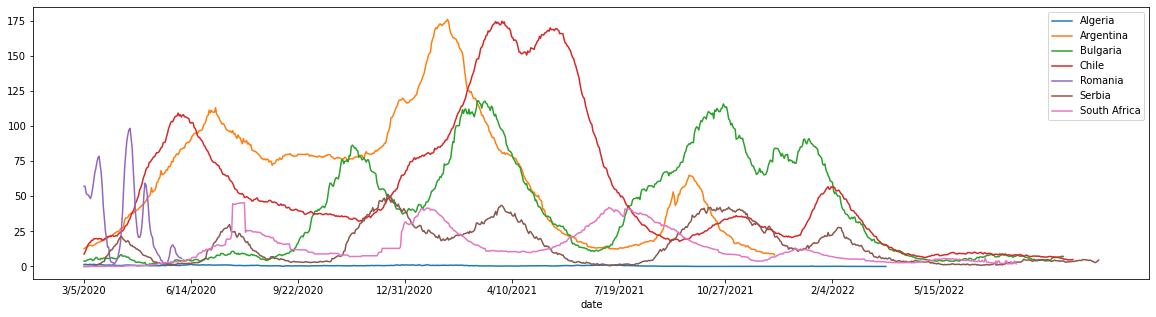

In [9]:
i=1
for c in c_countries:
  d[i].icu_patients_per_million.plot(figsize=(20,5), label=c)
  plt.legend(loc="upper right")
  i=i+1

In [10]:
d[1]

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
7/17/2020,Algeria,13.423,0.113,1.20,0.0,74.07,NaN,1.403
7/18/2020,Algeria,13.604,0.249,1.18,0.0,74.07,NaN,1.517
7/20/2020,Algeria,13.740,0.204,1.15,0.0,74.07,NaN,1.449
7/21/2020,Algeria,13.287,0.294,1.14,0.0,74.07,NaN,1.268
7/22/2020,Algeria,13.446,0.249,1.13,0.0,74.07,NaN,1.154
...,...,...,...,...,...,...,...,...
10/6/2022,Algeria,0.091,0.045,0.64,0.0,45.32,NaN,0.023
10/7/2022,Algeria,0.091,0.000,0.64,0.0,45.32,NaN,0.023
10/8/2022,Algeria,0.000,0.000,0.64,0.0,45.32,NaN,0.023


#Check For Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [12]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -11.030406801959135
2. P-Value :  5.687118928120496e-20
3. Num Of Lags :  48
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 28322
5. Critical Values :
	 1% :  -3.430580912110132
	 5% :  -2.86164205668897
	 10% :  -2.5668243216997686


#Figure Out Order for ARIMA Model

In [13]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
#model=auto_arima(df['icu_patients'], start_p=0, start_q=0, d=0,max_p=5,max_q=5,max_d=5,start_P=0,D=0,start_Q=0, max_P=5, max_D=5, max_Q=5, seasonal= True, information_criteria='AIC' )
#model.summary()


In [15]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing
# Training the Model

In [16]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')
data3=unclean_data[unclean_data.location=='India']
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()
data3=data3.iloc[:,:-1]
data3=data3.dropna()
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]

In [17]:
i=1
a=['1','2','3','4','5','6','7','8','9','10']
pred=['1','2','3','4','5','6','7','8','9','10']
for c in c_countries:
  print(d[i].location[1])
  train=d[i].iloc[:-30,:]
  test=d[i].iloc[-30:,:]
  print(train.shape,test.shape)
  a[i]=auto_arima(y=train['icu_patients_per_million'],X=train.iloc[:,1:6], m=14  ,trace=True, seasonal=True,suppress_warnings=True )
  start=len(train)
  end=len(train)+len(test)-1
  pred[i]=a[i].predict(len(testi.iloc[:,0:5]),X=testi.iloc[:,0:5])
  pred[i].index=d[i].index[start:end+1]
  print(pred[i])
  i=i+1
#print(test.iloc[0],test.iloc[-1])

Algeria
(721, 8) (30, 8)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=-1537.363, Time=12.32 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=-1470.850, Time=0.54 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=-1512.722, Time=9.31 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=-1527.555, Time=13.85 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=-1472.625, Time=1.17 sec
 ARIMA(2,1,2)(0,0,1)[14] intercept   : AIC=-1539.412, Time=9.89 sec
 ARIMA(2,1,2)(0,0,0)[14] intercept   : AIC=-1541.217, Time=1.89 sec
 ARIMA(2,1,2)(1,0,0)[14] intercept   : AIC=-1539.422, Time=9.10 sec
 ARIMA(1,1,2)(0,0,0)[14] intercept   : AIC=-1541.686, Time=2.35 sec
 ARIMA(1,1,2)(1,0,0)[14] intercept   : AIC=-1539.907, Time=5.87 sec
 ARIMA(1,1,2)(0,0,1)[14] intercept   : AIC=-1539.877, Time=7.39 sec
 ARIMA(1,1,2)(1,0,1)[14] intercept   : AIC=-1537.794, Time=9.03 sec
 ARIMA(0,1,2)(0,0,0)[14] intercept   : AIC=-1537.575, Time=3.31 sec
 ARIMA(1,1,1)(0,0,0)[14] intercept   : AIC=-15

# Predicting for new country

In [18]:
pred

['1', date
 9/11/2022     0.036747
 9/12/2022     0.034087
 9/13/2022     0.032649
 9/14/2022     0.027836
 9/15/2022     0.022612
 9/16/2022     0.036415
 9/17/2022     0.033154
 9/18/2022     0.033478
 9/19/2022     0.033969
 9/20/2022     0.037540
 9/21/2022     0.034715
 9/22/2022     0.054504
 9/23/2022     0.048287
 9/24/2022     0.049522
 9/25/2022     0.048242
 9/26/2022     0.047985
 9/27/2022     0.046080
 9/28/2022     0.042550
 9/29/2022     0.036147
 9/30/2022     0.053066
 10/1/2022     0.045413
 10/2/2022     0.042700
 10/3/2022     0.040648
 10/4/2022     0.037480
 10/5/2022     0.033815
 10/6/2022     0.029635
 10/7/2022     0.026108
 10/8/2022     0.025272
 10/9/2022     0.024855
 10/10/2022    0.023825
 dtype: float64, date
 3/20/2022    51.525626
 3/21/2022    51.640847
 3/22/2022    51.560400
 3/23/2022    51.507493
 3/24/2022    51.474153
 3/25/2022    51.205379
 3/26/2022    50.758807
 3/27/2022    50.525286
 3/28/2022    50.384167
 3/29/2022    50.023920
 3/30/2

In [19]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 KB 3.9 MB/s eta 0:00:00


In [20]:
import xlsxwriter

predictions=pred
new_list=[]

with xlsxwriter.Workbook('Predictions.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(predictions):
        worksheet.write_row(row_num, 0, data)

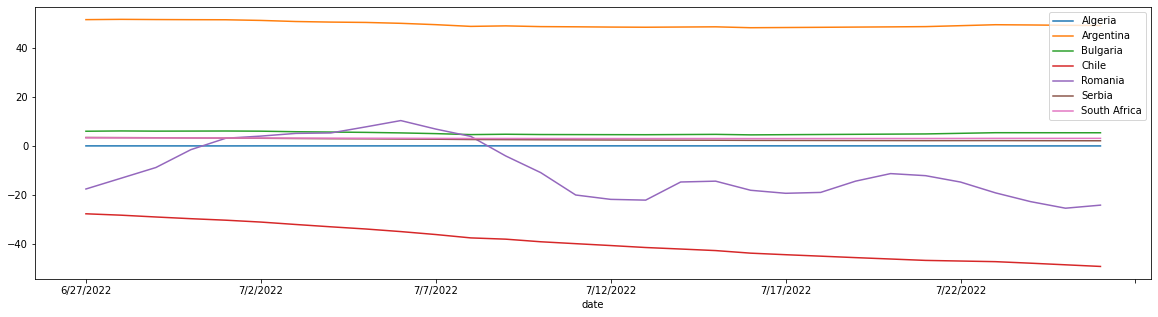

In [21]:
i=1
pred=list(pred)
for c in c_countries:
  pred[i].plot(figsize=(20,5), label=c)
  plt.legend(loc="upper right")
  i=i+1

In [22]:
test['icu_patients_per_million'].mean()

2.8331000000000004

In [23]:
"""from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)
"""

"from sklearn.metrics import mean_squared_error\nfrom math import sqrt\n\nrmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))\nprint(rmse)\n"

# PREPING DATA FOR ANN



In [24]:
predicted_list, error_list = [], []
training_data = train


In [25]:
print(error_list)


[]


In [27]:
# test_resid = []
# for i in resid_test:
#     test_resid.append(i[0])

error = mean_squared_error(test.iloc[0:30,-1], predicted_list[0:30])
print('Test MSE: %.3f' % error)

NameError: ignored

In [ ]:
training_error = model_fit.resid


In [ ]:
training_error=np.array(training_error)
training_error

#**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=7, activation="tanh"))
model.add(Dense(50,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')



In [ ]:
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])


In [ ]:
train_X

In [ ]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [ ]:
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

In [ ]:
print(new_train_X)

In [ ]:
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)


In [ ]:
# test_extended = error_list
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)


In [ ]:
test_data = np.array(test_data)

In [ ]:
test_data

In [ ]:

test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])


In [ ]:
new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
 


In [ ]:
predictions = model.predict(new_test_X)
predictions


In [ ]:
Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

In [ ]:
pred

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


#**Calculating the sum of prediction value by arima and amount error by the ann***

In [ ]:
np.shape(pred)

In [ ]:
np.shape(pred)

In [ ]:
np.shape(predicted_list[7:])

In [ ]:
type(pred)
pred=np.array(pred)

In [ ]:
pred= pred.tolist()

In [ ]:
#predicted_list=predicted_list.tolist()

In [ ]:
l= len(pred)


In [ ]:
print(l)

In [ ]:
pred_final=[]

In [ ]:
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)


In [ ]:
np.shape(pred_final)

In [ ]:
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)

In [ ]:
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()

# **Predicting for new country**

In [ ]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')

In [ ]:
data3=unclean_data[unclean_data.location=='India']
data3

In [ ]:
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()

In [ ]:
data3=data3.dropna(subset=['new_cases_per_million'])

In [ ]:
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]
start=len(traini)
end=len(traini)+len(testi)-1

In [ ]:
testi

In [ ]:
model=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30) )
model=model.fit()
model.summary()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(exog=testi.iloc[:,0:1],start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)